In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from csv import reader
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [3]:
def returnlabel(str):
    ret=[]
    with open(str, 'r') as read_obj:
        csv_reader = reader(read_obj)
        for row in csv_reader:
            row[0]=int(row[0])
            ret.append(row[0])
    return ret

In [4]:
X_train = pd.read_csv("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv",header=None).to_numpy()
X_test = pd.read_csv("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTestImagesSVM.csv",header=None).to_numpy()
Y_test=returnlabel("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTestLabelSVM.csv")
Y_test=np.array(Y_test)
Y_train =returnlabel("C:/Users/Hazem Elseify/Downloads/data/Arabic Handwritten Characters Dataset CSV/csvTrainLabel.csv")
Y_train=np.array(Y_train)
print("x_train.shape =", X_train.shape, 
      "\ny_train.shape =", Y_train.shape, 
      "\nx_test.shape =", X_test.shape, 
      "\ny_test.shape =", Y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440,) 
x_test.shape = (448, 1024) 
y_test.shape = (448,)


(13440, 1024) (448, 1024)
13440 448


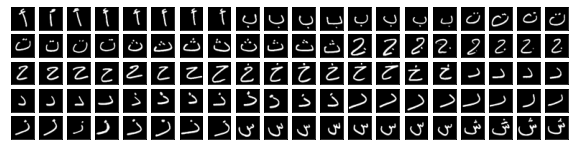

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape, X_test.shape)
print(Y_train.size, Y_test.size)
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(20,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(32,32).T,"gray")
plt.show()

In [6]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
#{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [7]:
X_train=X_train.reshape(-1,32,32,1)
X_test=X_test.reshape(-1,32,32,1)

In [8]:
model = Sequential()
model.add(Conv2D(512,(5,5),padding='valid',input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(1024,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(2048,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(2048))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 512)       13312     
_________________________________________________________________
activation (Activation)      (None, 28, 28, 512)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 1024)      13108224  
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 1024)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 1024)        0

In [10]:
model_feat = Model(inputs=model.input,outputs=model.get_layer("dense").output)

In [11]:
feat_test = model_feat.predict(X_test)
feat_train = model_feat.predict(X_train)

In [12]:
svc1=SVC(kernel='rbf')
svc1.fit(feat_train,Y_train)
svc1.score(feat_train,Y_train)

0.8043154761904762

In [13]:
svc1.score(feat_test,Y_test)

0.7120535714285714

In [21]:
import seaborn as sn
y_testnew=[]
for i in Y_test:
    y_testnew.append(i)

In [30]:
Y_predict=svc1.predict(feat_test)

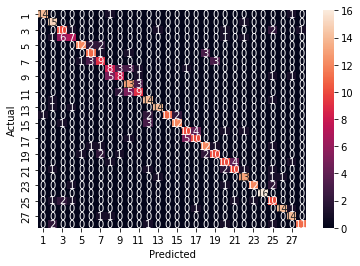

In [31]:
y_actu = pd.Series(y_testnew, name='Actual')
y_pred = pd.Series(Y_predict,name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
sn.heatmap(df_confusion, annot=True)
plt.show()